In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [14]:
image = mpimg.imread('./test_images/test1.jpg')

In [36]:
def show_images(img1, title1, img2=None, title2=None):    
    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(img1)
    ax1.set_title(title1, fontsize=30)    
    ax2.imshow(img2)
    ax2.set_title(title2, fontsize=30)

In [37]:
# def show_image(img1, title1):    
#     # Visualize undistortion
#     f, (ax1, ax2) = plt.subplots(1, 1, figsize=(20,10))
#     f.subplots_adjust(hspace = .2, wspace=.05)
#     ax1.imshow(img1)
#     ax1.set_title(title1, fontsize=30)    
#     #ax2.imshow(img2)
#     #ax2.set_title(title2, fontsize=30)

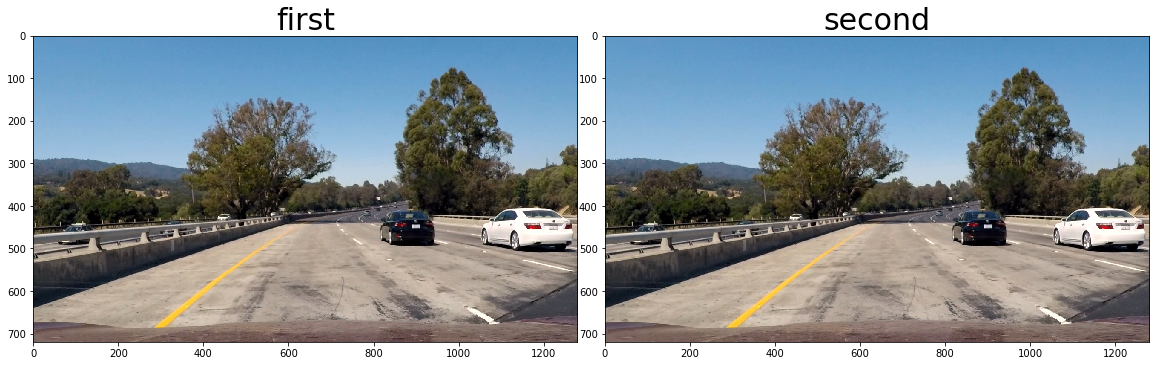

In [39]:
show_images(image, 'first', image, 'second')

In [40]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    return draw_img # Change this line to return image copy with boxes


In [41]:
def test_draw_boxes(image):
    # Add bounding boxes in this format, these are just example coordinates.
    bboxes = [((100, 100), (200, 200)), ((300, 300), (400, 400))]
    result = draw_boxes(image, bboxes)
    show_images(image, 'first', result, 'second')

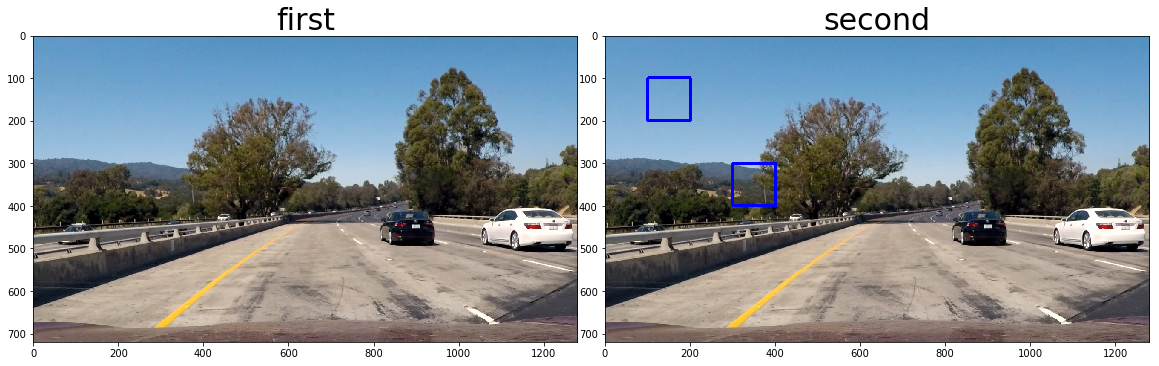

In [42]:
test_draw_boxes(image)

In [45]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
    ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
    bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
#rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

In [46]:
def test_hist(image):
    rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()

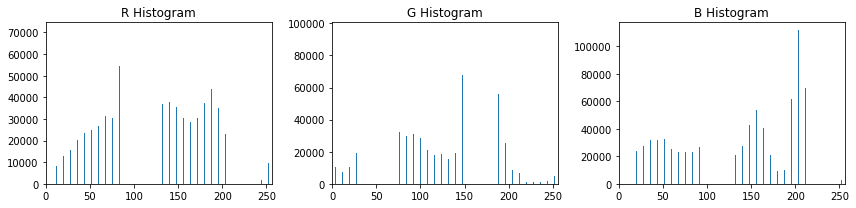

In [47]:
test_hist(image)

In [48]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

In [49]:
def test_bin_spatial(image):
    feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

    # Plot features
    plt.plot(feature_vec)
    plt.title('Spatially Binned Features')

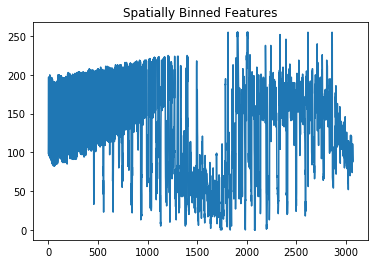

In [51]:
test_bin_spatial(image)